<a name="top" id="top"></a>

<div align="center">

<h1>PSO 2: Typical open-loop dynamic responses of second order systems</h1>

<p>
  <a href="https://github.com/bernalde"><strong>David E. Bernal Neira</strong></a><br>
  <em>Davidson School of Chemical Engineering, Purdue University</em><br>
  <em>Universities Space Research Association</em><br>
  <em>NASA QuAIL</em>
</p>

<br>

<p>
  <a href="https://github.com/mhuertasm"><strong>Mateo Huertas Marulanda</strong></a><br>
  <em>Chemical Engineering, National University of Colombia</em><br>
  <em>Undergraduate Visiting Scholar</em>
</p>

<br>

<p>
  <a href="https://colab.research.google.com" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
  </a>
  <a href="https://secquoia.github.io/">
    <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA">
  </a>
</p>

</div>

## 🎯 Objective
Understand and compare the behavior of second-order systems under step input for various damping conditions (overdamped, critically damped, and underdamped).

## 💻 Code Purpose
This script simulates and visualizes the step response of three second-order systems with different damping ratios. It helps identify how damping affects the transient response characteristics like overshoot, settling time, and rise time.

## 🔑 Key Functions
- `control.tf()`: Creates a transfer function model of the system.
- `control.step_response()`: The step response is the output of a system when a unit step input (from 0 to 1) is applied. The step_response() function takes a transfer function as input and returns the time values (t) and the system’s output (y).


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct


# Define a time vector 

In [33]:
t = np.linspace(0, 30, 100) # Define a time vector (from 0 to 30, with 100 points)

# Define the systems

In [34]:

# System 1: Second-order system with numerator [1], denominator [1, 4, 1]
# H1(s) = 1 / (s² + 4s + 1) Overdamped
num1 = [1]
den1 = [1, 4, 1]
sys1 = ct.tf(num1, den1)

# System 2: Second-order system with numerator [2], denominator [1, 2, 1]
# H2(s) = 2 / (s² + 2s + 1) Critically damped
num2 = [1]
den2 = [1, 2, 1]
sys2 = ct.tf(num2, den2)

# System 3: Second-order system with numerator [1], denominator [1, 0.5, 1]
# H3(s) = 1 / (s² + 0.5s + 1) Underdamped
num3 = [1]
den3 = [1, 0.5, 1]
sys3 = ct.tf(num3, den3)

# Define the step responses

In [35]:
# Apply the step input at time 0
t1, y1 = ct.step_response(sys1, t)
t2, y2 = ct.step_response(sys2, t)
t3, y3 = ct.step_response(sys3, t)

# Plot the step responses

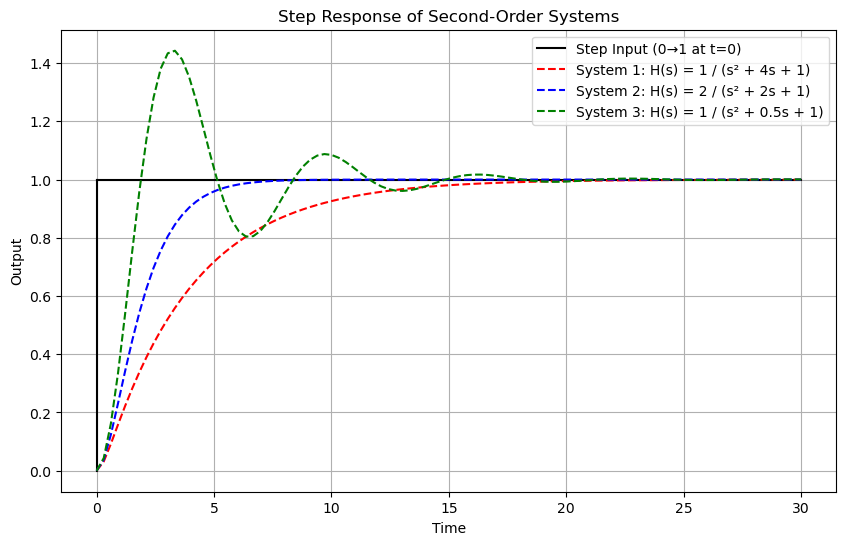

In [36]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))
plt.plot(t1, np.ones_like(t1), 'k-', linewidth=1.5, label='Step Input (0→1 at t=0)')
plt.plot([0, 0], [0, 1], 'k-', linewidth=1.5)

# Plot System 1 response (red dashed line)
plt.plot(t1, y1, 'r--', label='System 1: H(s) = 1 / (s² + 4s + 1)')

# Plot System 2 response (blue dashed line)
plt.plot(t2, y2, 'b--', label='System 2: H(s) = 2 / (s² + 2s + 1)')

# Plot System 3 response (green dashed line)
plt.plot(t3, y3, 'g--', label='System 3: H(s) = 1 / (s² + 0.5s + 1)')

# Set plot title and axis labels
plt.title("Step Response of Second-Order Systems")
plt.xlabel("Time")
plt.ylabel("Output")

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

---
## ✅ Conclusion

This exercise demonstrates how second-order systems respond differently to a step input depending on their **damping condition**, which describes how oscillations in a system decay over time.

In the plot we can see the different system responses:

- **🔴 System 1: Overdamped $H_1(s) = \frac{1}{s^2 + 4s + 1}$**
  - Slow and smooth response.
  - No oscillations.
  - High damping → very stable but sluggish.

- **🔵 System 2: Critically Damped $H_2(s) = \frac{2}{s^2 + 2s + 1}$**
  - Fastest response without overshooting.
  - No oscillations.
  - Optimal balance between speed and stability.

- **🟢 System 3: Underdamped  $H_3(s) = \frac{1}{s^2 + 0.5s + 1}$**
  - Fast initial rise.
  - Exhibits oscillations and overshoot.
  - Low damping → quicker but less stable.

The **damping ratio** plays a crucial role in shaping the time-domain behavior of second-order systems. 

Choosing the right damping level is essential in control system design, as it directly impacts:
- Response speed,
- Stability,
- Accuracy.

Engineers must balance these trade-offs to meet specific performance goals depending on the system's application.

---

## Individual Exercise 

Change the form of the transfer function to simulate:

1. **An unstable behavior**, and  
2. **A system at the limit of instability** (with sustained oscillations).

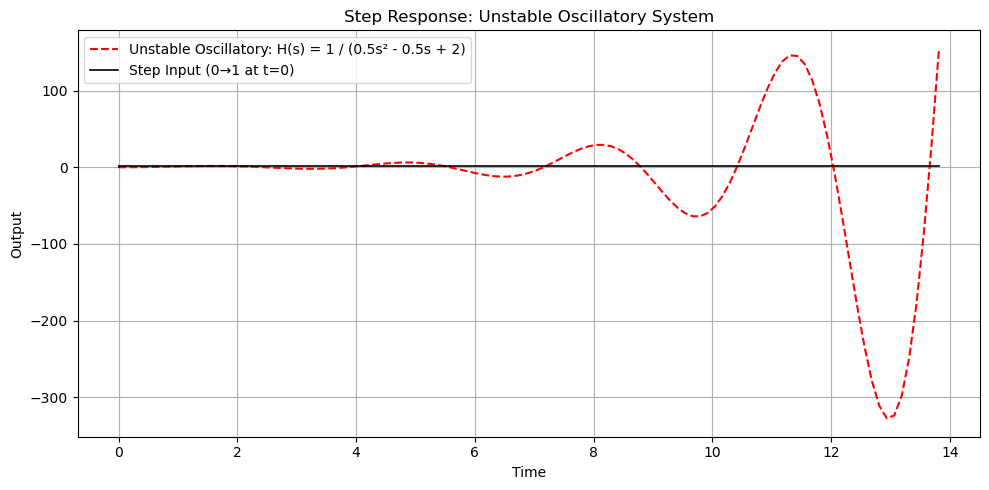

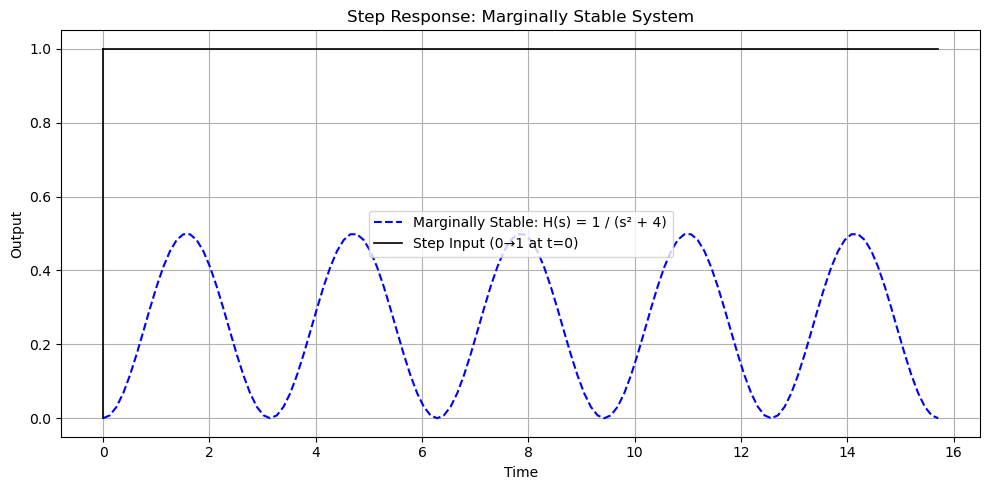

In [ ]:
# Define transfer functions

# Unstable oscillatory system: poles with positive real part
num_unstable = [1]
den_unstable = [0.5, -0.5, 2]
sys_unstable = ct.tf(num_unstable, den_unstable)

# Marginally stable system: purely imaginary poles
num_marginal = [1]
den_marginal = [1, 0, 4]
sys_marginal = ct.tf(num_marginal, den_marginal)

# Compute step responses
t1, y1 = ct.step_response(sys_unstable)
t2, y2 = ct.step_response(sys_marginal)

# -------------------- Plot 1: Unstable Oscillatory --------------------
plt.figure(figsize=(10, 5))
plt.plot(t1, y1, 'r--', label='Unstable Oscillatory: H(s) = 1 / (0.5s² - 0.5s + 2)')
plt.plot(t1, np.ones_like(t1), 'k-', linewidth=1.2, label='Step Input (0→1 at t=0)')
plt.plot([0, 0], [0, 1], 'k-', linewidth=1.2)
plt.title('Step Response: Unstable Oscillatory System')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------- Plot 2: Marginally Stable --------------------
plt.figure(figsize=(10, 5))
plt.plot(t2, y2, 'b--', label='Marginally Stable: H(s) = 1 / (s² + 4)')
plt.plot(t2, np.ones_like(t2), 'k-', linewidth=1.2, label='Step Input (0→1 at t=0)')
plt.plot([0, 0], [0, 1], 'k-', linewidth=1.2)
plt.title('Step Response: Marginally Stable System')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()